## Assignment 3: Food deserts

In this assignment, we'll use a variety of data sources to quantify the existence of food deserts in LA County. The assignment is *loosely* based on the food pantry example from class. It focuses on honing your skills in processing and joining data together, particularly spatially.

[Download the csv file of SNAP-authorized retailers from USDA.](https://www.fns.usda.gov/snap/retailer-locator) To my knowledge, this is the most comprehensive list of grocery outlets in the US.

Load it into a pandas dataframe called `snapDf`. Keep only the observations that are in Los Angeles County. 

In [32]:
# your code here

snapDf.head()
    
### BEGIN SOLUTION

import pandas as pd
snapDf = pd.read_csv('/Users/adammb/Desktop/SNAP_Store_Locations.csv')
snapDf = snapDf[snapDf.County=='LOS ANGELES']
### END SOLUTION


In [33]:
# Autograding tests - do not edit

assert all(snapDf.columns == ['X', 'Y', 'ObjectId', 'Store_Name', 'Address', 'Address_Line__2',
       'City', 'State', 'Zip5', 'Zip4', 'County', 'Longitude', 'Latitude'])
assert all(snapDf.County=='LOS ANGELES')
assert len(snapDf)==6181

If you look at the store names, many of the places that accept SNAP benefits are liquor stores and gas stations. These might have an important role where no other food is available, but are likely to have a limited range of food, particularly fresh produce. 

Let's keep them in the dataset for the moment, but create a new column, `liquor_or_gas`, that is `True` if the store has `liquor` or `gas` in its name (`Store_Name`), and is `False` otherwise. Note that `True` and `False` should be boolean values, not the strings `"True"` and `"False"`. 

Pay attention to upper vs lower case! But don't worry about spelling errors here (although that should be part of your data cleaning).

*Hint:* you can use `apply` with either a `lambda` anonymous function or a regular function. Look at the example from class where we create the `ped_accident_numeric` variable.

In [34]:
# your code here


### BEGIN SOLUTION

snapDf['liquor_or_gas'] = snapDf.Store_Name.apply(lambda x: 
                            True if 'liquor' in x.lower() or 'gas' in x.lower() else False)
### END SOLUTION

In [35]:
# Autograding tests - do not edit

assert snapDf.liquor_or_gas.mean().round(2) == 0.14
assert snapDf.liquor_or_gas.dtype=='bool'

Let's have a quick look at how the proportion of liquor stores / gas stations varies by city. If you look at the `City` field, there's some cleaning that needs to be done first, however.

Replace the `City` field so that all the cities are in Title case. (Title case means the first letter of each word is capitalized, such as Los Angeles or North Hollywood.)

*Hint:* The `title()` function works the same way as `upper()` and `lower()`.

In [36]:
# your code here


### BEGIN SOLUTION

snapDf.City = snapDf.City.str.title()

### END SOLUTION

In [37]:
# Autograding tests - do not edit

assert len(snapDf.City.unique()) == 146
assert 'Los Angeles' in snapDf.City.values

Now, look at the proportion of liquor stores / gas stations by city. 

Aside/ bonus: Plot this data if you feel inclined (a bar plot of the means by city would be my suggestion).

In which cities are at least 25% of the SNAP outlets liquor stores or gas stations? Assign this list of cities and their means to a `pandas` `Series` called `cities_subset`. (Remember, a `Series` is like a one-column `DataFrame`.) 

*Hint:* You'll need to `groupby` the `City` field to get the means for all cities. Then, in a second line, restrict your result to just those cities with a mean of at least 25%.

In [38]:
cities_subset = 999 # replace 999 with your answer
### BEGIN SOLUTION

cities_subset = snapDf.groupby('City').liquor_or_gas.mean()
cities_subset = cities_subset[cities_subset>=0.25]
### END SOLUTION

cities_subset.head()

City
Altadena       0.25
Bell           0.30
Bellflower     0.25
Glendora       0.25
Harbor City    0.25
Name: liquor_or_gas, dtype: float64

In [39]:
# Autograding tests - do not edit

assert isinstance(cities_subset, pd.Series)
assert len(cities_subset)==14

Now, let's bring in the [California EnviroScreen data](https://oehha.ca.gov/calenviroscreen/maps-data). This has both demographic and environmental justice-related data, and also the spatial boundaries of census tracts.

Download and unzip the shapefile version (the kml will probably also work). [Direct link here](https://oehha.ca.gov/media/downloads/calenviroscreen/document/ces3shp.zip).

Load the data in to a `geopandas` `GeoDataFrame` called `esGdf`, and restrict it to the tracts in LA county. (In my version, the `county` column is named `California` for some reason.)

In [40]:
# your code here
esgdf = 999 # replace with 

### BEGIN SOLUTION
import geopandas as gpd
esGdf = gpd.read_file('/Users/adammb/Desktop/CESJune2018Update_SHP/CES3June2018Update.shp')
esGdf = esGdf[esGdf.California=='Los Angeles']
### END SOLUTION

esGdf.head()

,tract,pop2010,California,ZIP,City,Longitude,Latitude,CIscore,CIscoreP,ozone,...,Native_Ame,Asian_Amer,Other_pct,OBJECTID_1,CIdecile,CIvigintil,Shape_Leng,Shape_Area,CES2018_Rn,geometry
5692,6.037920e+09,7027,Los Angeles,91321,Newhall,-118.535884,34.385597,29.40,58,0.065,...,0.2,3.0,1.2,3342,6,12,6695.407851,1.656761e+06,55-60%,"POLYGON ((135258.650 -402745.383, 135455.130 -..."
5693,6.037920e+09,2686,Los Angeles,91350,Santa Clarita,-118.516404,34.443548,13.03,20,0.065,...,0.1,9.0,3.4,6042,3,5,4568.318310,9.978605e+05,20-25%,"POLYGON ((137014.367 -395334.286, 137043.791 -..."
5694,6.037573e+09,1802,Los Angeles,90806,Long Beach,-118.202069,33.794397,52.24,91,0.042,...,0.4,16.9,2.6,663,10,19,2746.793814,4.497052e+05,90-95%,"POLYGON ((166781.011 -467093.264, 166797.258 -..."
5695,6.037572e+09,4107,Los Angeles,90805,Long Beach,-118.187072,33.849946,35.49,69,0.042,...,0.3,15.0,1.9,2547,7,14,3409.734295,4.811644e+05,65-70%,"POLYGON ((167983.809 -460715.458, 167993.503 -..."
5696,6.037570e+09,4587,Los Angeles,90805,Long Beach,-118.204486,33.877867,58.76,96,0.042,...,0.1,4.4,0.9,281,10,20,3222.654440,5.718710e+05,95-100% (highest scores),"POLYGON ((166480.934 -457746.407, 166497.850 -..."


In [41]:
# Autograding tests - do not edit

assert len(esGdf)==2343
assert isinstance(esGdf, gpd.GeoDataFrame)

Now let's try and join the SNAP dataset to the EnviroScreen data. `esGdf` already has a `geometry` column and is a `geopandas` GeoDataFrame, but `snapDf` is a regular `pandas` DataFrame.

Use the `Latitude` and `Longitude` columns add a point geometry field to `snapDf`, and turn it into a `GeoDataFrame` called `snapGdf`. 

*Hint*: look at the notebook from Week 3 (the section under Housing Production).

In [42]:
snapGdf = 999 # replace 999 with your solution

### BEGIN SOLUTION
snapGdf = gpd.GeoDataFrame(
    snapDf, geometry=gpd.points_from_xy(snapDf.Longitude, snapDf.Latitude, crs='EPSG:4326'))

### END SOLUTION


In [43]:
# Autograding tests - do not edit

assert isinstance(snapGdf, gpd.GeoDataFrame)
assert snapGdf.geometry.x.min().round(2) == -118.81
assert snapGdf.geometry.y.max().round(2) == 35.13

Now, let's join the two GeoDataFrames together. The aim: count the number of SNAP outlets (in both our liquor store/gas station and other categories) per census tract.

There are several ways to do it. My suggestion is as follows:
1. Add the `tract` column to `snapGdf` using a spatial join
2. Aggregate `snapGdf` by the new `tract` column using `groupby()`, to get a count of SNAP outlets in each tract
3. Join those counts to `esGdf`

Let's do these one step at a time. First, add the `tract` column to `snapGdf`. I suggest you use the `gpd.sjoin()` function and a left join. Call the new `GeoDataFrame` `snapGdf2`.

*Hint:* You might need to reproject!

In [44]:
snapGdf2 = 999 # replace 999 with your code

### BEGIN SOLUTION
snapGdf2 = gpd.sjoin(snapGdf, esGdf.to_crs('EPSG:4326'), how="left", op='intersects')
### END SOLUTION

In [45]:
# Autograding tests - do not edit
assert len(snapGdf2)==6212
assert 'tract' in snapGdf2.columns


That should have been a 1:many join, not the 1:1 join that you might have been expecting. Think about what might have caused this! 

We didn't cover in class how to drop the duplicates, but the line of code below should fix it.



In [46]:
print('{} rows in snapGdf'.format(len(snapGdf)))
print('{} rows in snapGdf2 (after join)'.format(len(snapGdf2)))

# you can also see that the ObjectId column (which identifies the SNAP providers) 
# is unique before the join, but not after
print(snapGdf.ObjectId.is_unique)  # is there one row per SNAP outlet before the join?
print(snapGdf2.ObjectId.is_unique) # is there one row per SNAP outlet after the join?

# drop the duplicates by just taking the first ObjectId that joins to each tract
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
snapGdf2.drop_duplicates(subset='ObjectId', keep='first', inplace=True)
print('{} rows in snapGdf2 (after dropping duplicates)'.format(len(snapGdf2)))

6181 rows in snapGdf
6212 rows in snapGdf2 (after join)
True
False
6181 rows in snapGdf2 (after dropping duplicates)


Now, aggregate snapGdf by the new `tract` column to get a count of outlets in each census tract. 

You should produce a dataframe with two columns: `n_outlets_liquor_gas` and `n_outlets_other`. Replace any NaN values with zeros.

*Hint:* The simplest way is to use `groupby()` in two different lines of code, to get the count of each type of outlet by census tract. Then you can use the line of code (`aggDf = `) below to merge them into a single `DataFrame`.

*Hint:* The `.fillna()` function will fill in missing values.


In [47]:
tmpDf1 = [999] # create the dataframe with the tract-level counts for liquor/gas outlets
tmpDf2 = [999] # create the dataframe with the tract-level counts for other outlets

aggDf = pd.DataFrame({'n_outlets_liquor_gas': tmpDf1, 'n_outlets_other': tmpDf2})
# now replace your NaNs with zeros


### BEGIN SOLUTION
tmpDf1 = snapGdf2[snapGdf2.liquor_or_gas==True].groupby(['tract']).size()
tmpDf2 = snapGdf2[snapGdf2.liquor_or_gas==False].groupby(['tract']).size()
aggDf = pd.DataFrame({'n_outlets_liquor_gas': tmpDf1, 'n_outlets_other': tmpDf2})
aggDf.fillna(0, inplace=True)
### END SOLUTION


In [48]:
# Autograding tests - do not edit
assert aggDf.n_outlets_liquor_gas.sum()==835
assert aggDf.n_outlets_other.sum()==5301

Final step in the join process! Let's join `aggDf` back to `esGdf` to create a new geodataframe called `joinedGdf`. This should be a left join (so you don't leave out any census tracts) on the `tract` column.

*Hint*: You'll probably see that `tract` is the index of `aggDf`, and a regular column in `esGdf`. There are multiple ways to handle this, but the easiest is to set the index of `esGdf` to be `tract`.

In [49]:
joinedGdf = 999 # your answer here

### BEGIN SOLUTION
joinedGdf = esGdf.set_index('tract').join(aggDf, how='left')
### END SOLUTION

In [50]:
assert len(joinedGdf) == len(esGdf)

Now plot a map of the `n_outlets_other` column. Use the examples from class. At a minimum, your map should have:
* a basemap (e.g. from contextily)
* a legend or colorbar
* a title

If you can figure it out, you might want to drop Catalina Island to focus on mainland LA County. (Hint: the `ax.set_ylim()` function is useful here.)

Text(812.765100630951, 0.5, 'number of outlets')

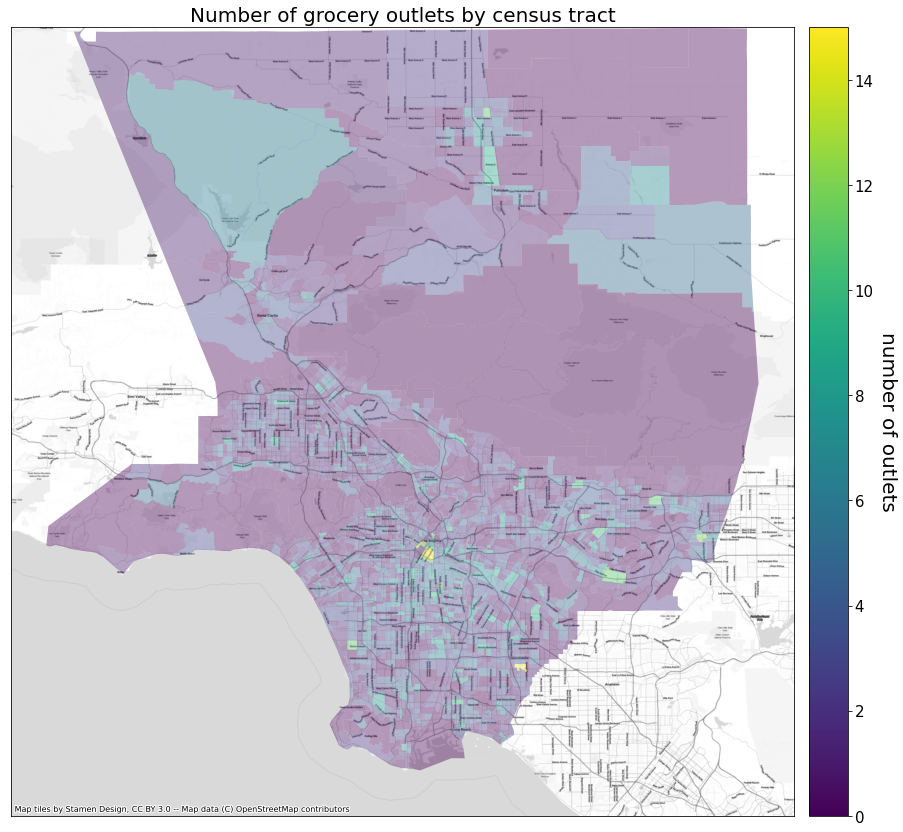

In [51]:

import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

### BEGIN SOLUTION
fig, ax = plt.subplots(figsize=(15,15))

# make color bar smaller
# following code from
# https://stackoverflow.com/questions/57541252/change-the-size-of-the-colorbar-in-geopandas-plot-i-got-error-unknown-property
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2) # depends on

# fill the missing values with zeros
joinedGdf.n_outlets_other.fillna(0, inplace=True)

joinedGdf.to_crs('EPSG:3857').plot('n_outlets_other', cmap='viridis', legend=True, ax = ax, cax=cax, alpha=0.4)
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

# drop Catalina
ax.set_ylim([3.98e6, 4.14e6])

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Number of grocery outlets by census tract', fontsize=20)

# adjust colorbar font size
# https://gis.stackexchange.com/questions/378416/how-to-change-the-font-size-of-the-color-bar-of-a-geopandas-choropleth-plot
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=15)
cb_ax.set_ylabel('number of outlets', fontsize=20, rotation=270, va='bottom' )
### END SOLUTION



Reflect on this assignment. What did you find most challenging? What problems did you encounter? How might you have gone about it differently the next time? (Write a few bullet points in a markdown cell.)

To help me calibrate future assignments, please also indicate about how long it took you to complete.

# Challenge Problem
Remember, you need to do at least two of these challenge problems this quarter.

We mapped the number of grocery stores, but didn't say anything directly about food deserts. In the challenge, take this analysis further. My suggestion:
* Normalize your number of outlets (e.g. by population) and plot these data
* Plot the normalized number of outlets (both gas/liquor and other) against race, income, and other variables from EnviroScreen
* Think about boundary issues created by the artefacts of census geography. Create a measure of the number of outlets within (say) 2km of a census tract boundary, even if they do not intersect that tract
* Briefly write a few sentences that intepret your results

If you want to go further, please do!







